Error in R_nc4_open: No such file or directory


ERROR: Error in nc_open(paste0(nc_path, "_filtered.nc")): Error in nc_open trying to open file /scratch/sadamov/wd/21_betu_tuning/21032000_c1e_tsa_betu_tuning/lm_coarse/lfff00150000_filtered.nc


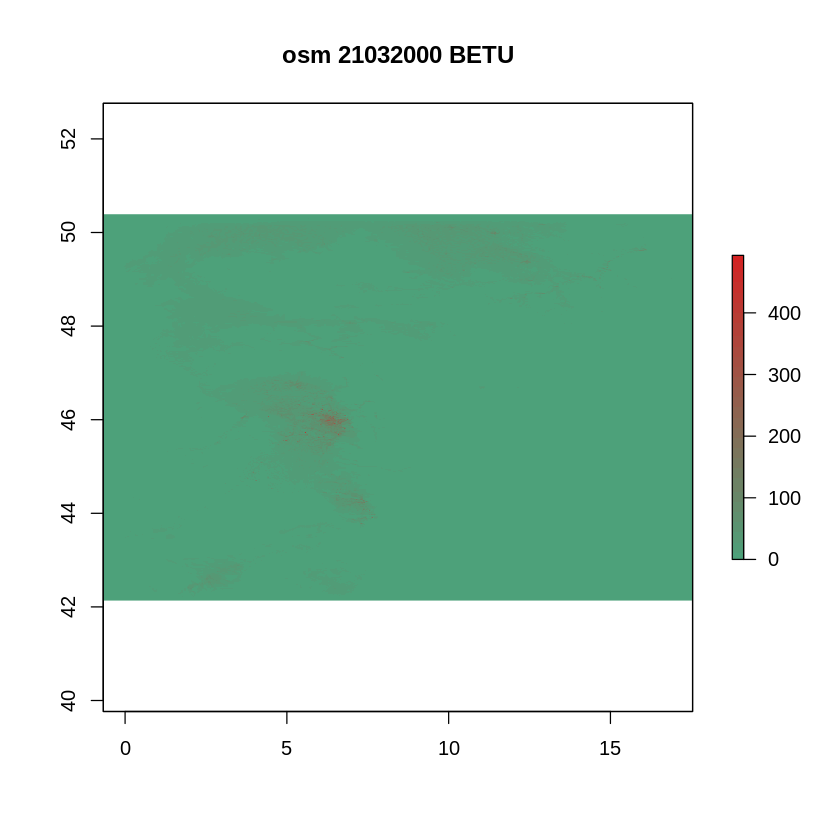

In [9]:
library(ncdf4)
library(raster)

for (model_version in c("osm", "tuning")) {
  i <- 1
  date <- 21033000
  nc_path <- paste0("/scratch/sadamov/wd/21_betu_", model_version, "/", date, "_c1e_tsa_betu_", model_version, "/lm_coarse/lfff00150000") # This can be any netCDF file with POAC (e.g.)
  variable <- "BETU"
  # If running in a container 
  # print(paste0("fxfilter --force -s ", variable, " ", nc_path, " -o ", nc_path, "_filtered"))
  # print(paste0("fxconvert --force nc ", nc_path, "_filtered -o ", nc_path, "_filtered.nc"))

  system(paste0("fxfilter --force -s ", variable, " ", nc_path, " -o ", nc_path, "_filtered"))
  system(paste0("fxconvert --force nc ", nc_path, "_filtered -o ", nc_path, "_filtered.nc"))

  con <- nc_open(paste0(nc_path, "_filtered.nc"))
  if (con$ndims == 5) {
    layer <- ncvar_get(con, paste(variable))[, , 80]
  } else {
    layer <- ncvar_get(con, paste(variable))
  }
  x <- ncvar_get(con, "lon_1")
  y <- ncvar_get(con, "lat_1")
  nc_close(con)

  if (variable %in% c("ALNU", "ALNUress", "ALNUreso", "ALNUfe ", 
                      "POAC", "POACress", "POACreso", "POACfe ")){
    layer <- log10(layer + 1)
  }

  if (i == 1){
    limits <- c(min(layer), max(layer))
  }

  r <- raster(layer,
    xmn = min(x), xmx = max(x),
    ymn = min(y), ymx = max(y), 
    crs = crs(paste('+units=m +a=6367470 +o_proj=longlat +b=6367470',
                      '+o_lat_p=43.0 +lon_0=10.0 +proj=ob_tran +o_lon_p=0.0'))
  )

  pal <- colorRampPalette(c("#4da17a", "#d32323"))
  plot(
    r,
  zlim = limits,
  col = pal(30),
  main = paste(model_version, date, variable))
  i = 0
}